<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/NFLWinPercentageBreakdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the library for NFL Data
!pip install nfl_data_py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.9.0 requires pandas>=2.1, but you have pandas 1.5.3 wh

In [2]:
# NFL Data
import nfl_data_py as nfl

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from PIL import Image
import urllib

In [68]:
pbp = nfl.import_pbp_data([2024], include_participation=False)
pbp_game = pbp[pbp["game_id"] == "2024_04_KC_LAC"]
#pbp_game = pbp_game[["game_id", "home_team", "away_team","posteam","time", "fixed_drive", "qtr", "home_wp","wp", "home_score", "away_score","fixed_drive_result"]]

pbp_game.head(10)

2024 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

First Team: lac
Second Team: pit
Season: 2024
2024 done.
Downcasting floats.


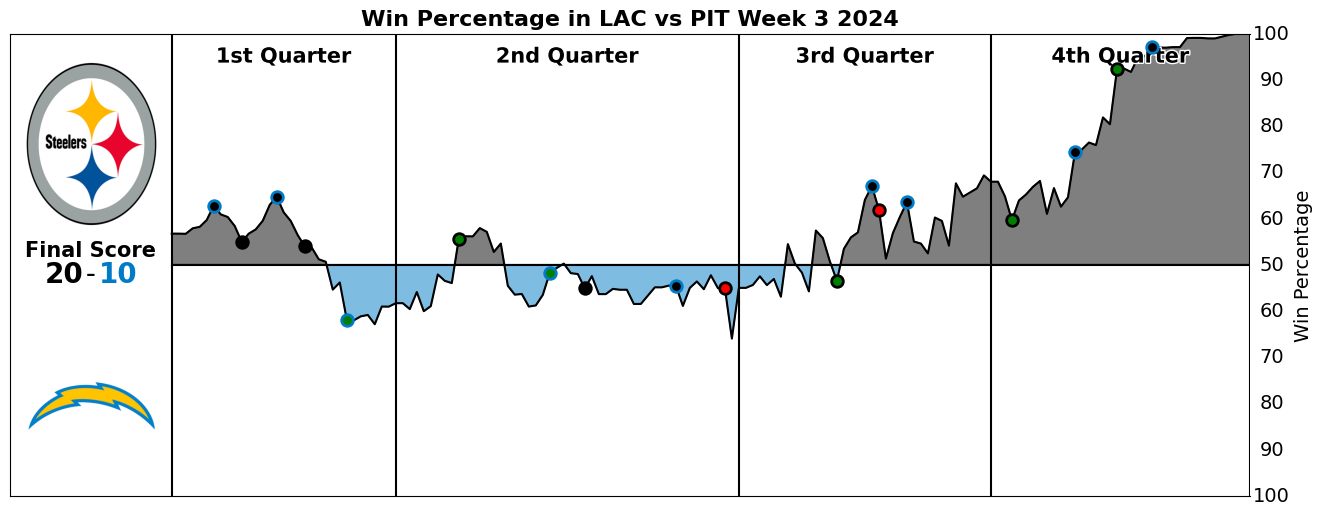

In [93]:
# Input data
tm1 = input("First Team: ").upper()
tm2 = input("Second Team: ").upper()
year = input("Season: ")
years = int(year)

# GAME SELECTION
game_ids = []
rev_game_ids = []
for wk in range(1,23):
  if (wk < 10):
    game_ids.append(f"{year}_0{wk}_{tm1}_{tm2}")
    rev_game_ids.append(f"{year}_0{wk}_{tm2}_{tm1}")

  else:
    game_ids.append(f"{year}_{wk}_{tm1}_{tm2}")
    rev_game_ids.append(f"{year}_{wk}_{tm2}_{tm1}")


game = nfl.import_pbp_data([years], include_participation=False)

pd.set_option('display.max_columns', None)
gm_stats = game[["game_id", "home_team", "away_team","posteam","time", "fixed_drive", "qtr", "home_wp","wp", "home_score", "away_score","drive_end_transition"]]


actual_game = gm_stats[gm_stats["game_id"] == game_ids[0]]

# Select specific game if teams played twice because they are divisional opponents
def div_teams():
  game_choice = input("Those teams are divisonal opponents and played twice in the regular season. Choose Matchup: Week " + f"{div1_wk}" + "(type 1)" + " or Week " + f"{div2_wk}" + "(type 2): ")
  if (game_choice == "1"):
    actual_game = gm_stats[gm_stats["game_id"] == f"{div1}"]
    wk = div1_wk
    home = tm2
  if (game_choice == "2"):
    actual_game = gm_stats[gm_stats["game_id"] == f"{div2}"]
    wk = div2_wk
    home = tm1

game_count = 0;

for i in range(0, len(game_ids)):

  temp_game = gm_stats[gm_stats["game_id"] == game_ids[i]]
  if (len(temp_game) != 0):
    actual_game = temp_game
    wk = i+1

    game_count += 1
    div1_wk = i+1
    div1 = game_ids[i]

    home = tm2

  temp_game = gm_stats[gm_stats["game_id"] == rev_game_ids[i]]
  if (len(temp_game) != 0):
    actual_game = temp_game
    wk = i+1

    game_count += 1
    div2_wk = i+1
    div2 = rev_game_ids[i]

    home = tm1

if ((game_count > 1) & (wk > 18)):
  playoff_choice = input("Those teams played in the regular season and the playoffs. Do you want the playoff game (type 1) or regular season game (type 2): ")
  if (playoff_choice == "1"):
    actual_game = gm_stats[gm_stats["game_id"] == f"{div1}"]

  if (playoff_choice == "2"):
    actual_game = gm_stats[gm_stats["game_id"] == f"{div2}"]
    if (game_count == 3):
      div_teams()

elif (game_count == 2):
  div_teams()


wp = actual_game.reset_index(drop = True)

wp['play_num'] = range(len(wp))

wp.rename(columns= {"index": "play_num"},inplace= True)

wp["home_wp"] = wp["home_wp"] * 100
wp["play_num"] = wp["play_num"] / (len(wp)-1) * 200

wp_time = wp.sort_values(by = ["qtr","time"], ascending = [True, False]).reset_index(drop = True)

play_qtr = wp_time.groupby('qtr').last().reset_index()

# Team data
team = nfl.import_team_desc()

home_info = team[team["team_abbr"] == wp["home_team"][0]]
away_info = team[team["team_abbr"] == wp["away_team"][0]]

home_col = home_info["team_color"].values[0]
away_col = away_info["team_color"].values[0]


# GRAPHING
fig, ax = plt.subplots(figsize = (16,6))


# WP Graph
ax.plot(wp["play_num"], wp["home_wp"], color="k")
ax.fill_between(wp["play_num"], wp["home_wp"], y2=50, where=(wp["home_wp"] >= 50), color=home_col, alpha=0.5, interpolate=True)
ax.fill_between(wp["play_num"], wp["home_wp"], y2=50, where=(wp["home_wp"] < 50), color=away_col, alpha=0.5, interpolate=True)

# Drive result graphing
wp_result = wp.groupby('fixed_drive').last().reset_index()
for i in range(len(wp_result)):
  # Team outline color
  if (wp_result["posteam"][i] == wp["home_team"][0]):
    outline_col = home_col
  else:
    outline_col = away_col

  # Event coloring
  if wp_result["drive_end_transition"][i] in ["TOUCHDOWN","FIELD_GOAL"]:
    ax.scatter(wp_result['play_num'].iloc[i], wp_result['home_wp'].iloc[i], color="green", s=70, edgecolors=outline_col, linewidths=2, zorder=100)
  elif wp_result["drive_end_transition"][i] in ["INTERCEPTION","FUMBLE","MISSED_FG","DOWNS"]:
    ax.scatter(wp_result['play_num'].iloc[i], wp_result['home_wp'].iloc[i], c="red", s=70, edgecolors=outline_col, linewidths=2, zorder=100)
  elif wp_result["drive_end_transition"][i] in "PUNT":
    ax.scatter(wp_result['play_num'].iloc[i], wp_result['home_wp'].iloc[i], c="black", s=70, edgecolors=outline_col, linewidths=2, zorder=100)


# Even odds line
ax.plot([0, 200], [50, 50], color="k")


# Quarter Lines
ax.axvline(0, color="k")
for i in range(0,len(play_qtr)-1):
  ax.axvline(play_qtr["play_num"][i], color="k")
ax.axvline(200, color="k")

plt.text(play_qtr["play_num"][0] / 2, 95, "1st Quarter", fontsize=15, color="k", ha='center', va='center', weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground="w")])
plt.text(((play_qtr["play_num"][1]-play_qtr["play_num"][0]) / 2) + play_qtr["play_num"][0], 95, "2nd Quarter", fontsize=15, color="k", ha='center', va='center', weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground="w")])
plt.text(((play_qtr["play_num"][2]-play_qtr["play_num"][1]) / 2)+ play_qtr["play_num"][1], 95, "3rd Quarter", fontsize=15, color="k", ha='center', va='center', weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground="w")])
plt.text(((play_qtr["play_num"][3]-play_qtr["play_num"][2]) / 2) + play_qtr["play_num"][2], 95, "4th Quarter", fontsize=15, color="k", ha='center', va='center', weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground="w")])
if len(play_qtr) == 5:
  plt.text(((play_qtr["play_num"][4]-play_qtr["play_num"][3]) / 2) + play_qtr["play_num"][3], 95, "OT", fontsize=15, color="k", ha='center', va='center', weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground="w")])


# Final Score
plt.text(-15, 53, "Final Score", fontsize=15, color="k", ha='center', va='center', weight='bold')
plt.text(-20, 48, str(wp["home_score"][len(wp)-1]), fontsize=20, color=home_col, ha='center', va='center', weight='bold')
plt.text(-10, 48, str(wp["away_score"][len(wp)-1]), fontsize=20, color=away_col, ha='center', va='center', weight='bold')
plt.text(-15, 48, " - ", fontsize=20, color="k", ha='center', va='center')


# Labels
plt.ylim([0, 100])
plt.xlim([-30, 200])
plt.xticks([])
plt.yticks([])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
2
# WP Labels
for i in range(0,6):
    if i == 0:
      plt.text(204, 50, '50', fontsize=14, color="k", ha='center', va='center')
    else:
      plt.text(204, 50+10*i, f'{50+10*i}', fontsize=14, color="k", ha='center', va='center')
      plt.text(204, 50-10*i, f'{50+10*i}', fontsize=14, color="k", ha='center', va='center')
plt.text(210, 50, "Win Percentage", fontsize=14, color="k", ha='center', va='center', rotation=90)

# Title
ax.set_title("Win Percentage in " + tm1 + " vs " + tm2 + " Week " + str(wk) + " " + year, fontsize=16, weight='bold')


# Logo
home_logo_url = home_info["team_logo_espn"].values[0]
away_logo_url = away_info["team_logo_espn"].values[0]

home_logo_img = Image.open(urllib.request.urlopen(home_logo_url))
away_logo_img = Image.open(urllib.request.urlopen(away_logo_url))

ax.imshow(home_logo_img, extent=(-28, -2, 57, 95), aspect='auto', zorder=10)
ax.imshow(away_logo_img, extent=(-28, -2, 5, 33), aspect='auto', zorder=10)

ax.spines['right'].set_visible(False)